<a href="https://colab.research.google.com/github/viannaandreBR/My-Data-Science-Journey/blob/main/Rede_Neural_TensorFlow_Personagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural com TensorFlow - Personagens

## Importação das bibliotecas

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.3.0'

## Carregamento da base de dados

In [ ]:
dataset = pd.read_csv('personagens.csv')

In [ ]:
dataset.shape

(293, 7)

In [ ]:
dataset.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


In [ ]:
dataset.tail()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
288,0.0,0.0,0.0,0.000000,6.485412,0.093921,Homer
289,0.0,0.0,0.0,0.000000,0.000000,0.042194,Homer
290,0.0,0.0,0.0,0.000000,4.263629,0.076761,Homer
291,0.0,0.0,0.0,0.000000,1.429133,0.017013,Homer
292,0.0,0.0,0.0,13.744248,0.853902,0.063546,Homer


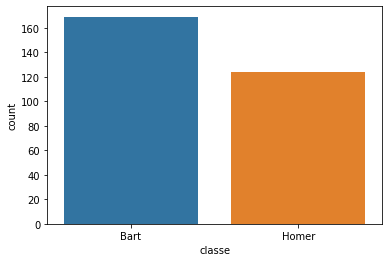

In [ ]:
sns.countplot(x = 'classe', data=dataset)

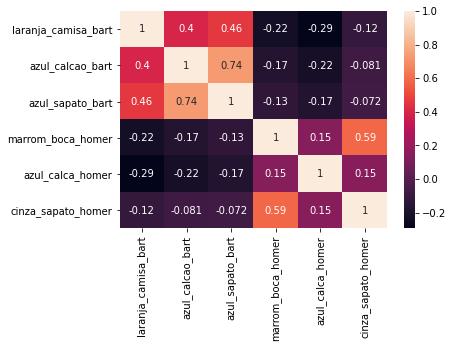

In [ ]:
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
X = dataset.iloc[:, 0:6].values
X

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [ ]:
y = dataset.iloc[:, 6].values
y

array(['Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
      

In [ ]:
y = (y == 'Bart')
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_treinamento.shape, y_treinamento.shape

((234, 6), (234,))

In [ ]:
X_teste.shape, y_teste.shape

((59, 6), (59,))

## Construção e treinamento da rede neural

In [ ]:
(6 + 1) / 2

3.5

In [ ]:
# (entradas + saídas) / 2
# 6 -> 4 -> 4 -> 4 -> 1

In [ ]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 28        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
historico = rede_neural.fit(X_treinamento, y_treinamento, epochs=50, validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 0s 35ms/step - loss: 0.7514 - accuracy: 0.4286 - val_loss: 0.7271 - val_accuracy: 0.4583
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7405 - accuracy: 0.4333 - val_loss: 0.7205 - val_accuracy: 0.3333
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.7315 - accuracy: 0.4286 - val_loss: 0.7143 - val_accuracy: 0.3333
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7225 - accuracy: 0.4190 - val_loss: 0.7091 - val_accuracy: 0.3333
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7156 - accuracy: 0.4143 - val_loss: 0.7043 - val_accuracy: 0.3333
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7090 - accuracy: 0.4238 - val_loss: 0.7004 - val_accuracy: 0.3750
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7028 - accuracy: 0.4619 - val_loss: 0.6970 - val_accuracy: 0.4583
Epoch 8/50
7/7 [=================

## Avaliação da rede neural

In [ ]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

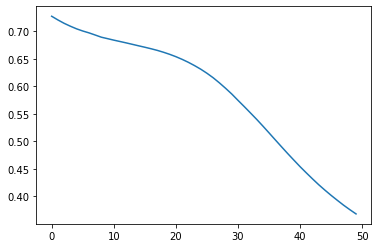

In [ ]:
plt.plot(historico.history['val_loss'])

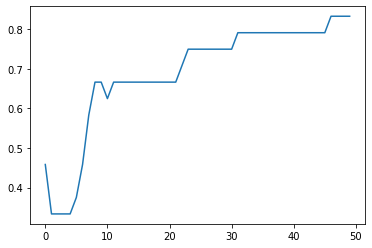

In [ ]:
plt.plot(historico.history['val_accuracy'])

In [ ]:
previsoes = rede_neural.predict(X_teste)
previsoes

array([[0.44313228],
       [0.88057196],
       [0.3562092 ],
       [0.12190324],
       [0.05006388],
       [0.25517586],
       [0.15188372],
       [0.93800354],
       [0.1537162 ],
       [0.4688268 ],
       [0.00514391],
       [0.53533626],
       [0.9005114 ],
       [0.72641057],
       [0.95797753],
       [0.9136754 ],
       [0.979062  ],
       [0.5561848 ],
       [0.3057126 ],
       [0.879127  ],
       [0.87517065],
       [0.87362427],
       [0.1524184 ],
       [0.19638386],
       [0.5551437 ],
       [0.8067451 ],
       [0.9691733 ],
       [0.34362707],
       [0.2598365 ],
       [0.69530356],
       [0.53983676],
       [0.82472223],
       [0.5650956 ],
       [0.956469  ],
       [0.08592278],
       [0.8904241 ],
       [0.5610439 ],
       [0.4677466 ],
       [0.5564329 ],
       [0.5477443 ],
       [0.8763091 ],
       [0.3551928 ],
       [0.09169555],
       [0.5547167 ],
       [0.98722005],
       [0.9292269 ],
       [0.55659175],
       [0.956

In [ ]:
# 1 True - Bart
# 0 False - Homer

In [ ]:
previsoes = (previsoes > 0.5)
previsoes

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
y_teste

array([False,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
        True, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.8983050847457628

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
cm

array([[19,  6],
       [ 0, 34]])

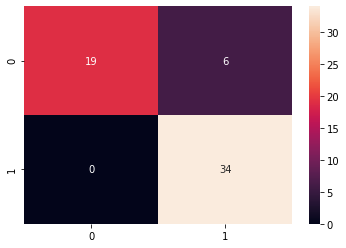

In [ ]:
sns.heatmap(cm, annot=True)